**Objetivos da aula:**

* Compreender a teoria dos histogramas e sua aplicação na análise de imagens.
* Explorar técnicas de equalização de histograma para melhoria de contraste.
* Desenvolver habilidades práticas em segmentação de imagens usando abordagens iterativas e vetorizadas.
* Integrar o uso da webcam com OpenCV para aquisição e processamento dinâmico de imagens.


## Introdução aos Histogramas

Um histograma é uma representação gráfica da distribuição dos níveis de intensidade em uma imagem. Em imagens em escala de cinza, ele mostra a frequência de ocorrência de cada nível de cinza (0 a 255). Em imagens coloridas, o histograma pode ser calculado separadamente para cada canal (R, G e B).

- h(rk) = nk, onde:
  - rk é o k-ésimo nível de cinza
  - nk é o número de pixels com intensidade rk
  - k = 0, 1, 2, ..., L-1

**Por que utilizar histogramas?**
- Análise de contraste e brilho.
- Detecção de problemas de exposição.
- Base para técnicas de equalização e normalização.

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

print ("OpenCV Version : %s " % cv2.__version__)


OpenCV Version : 4.8.0 


(214, 226)

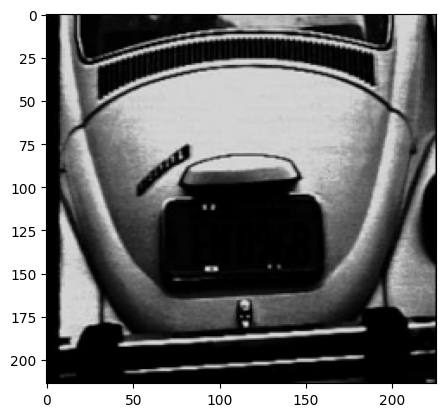

In [3]:
img = cv2.imread("fuca.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)

img.shape



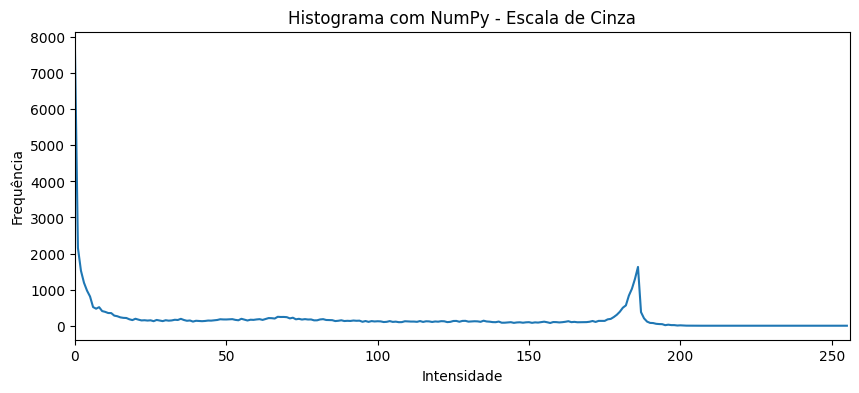

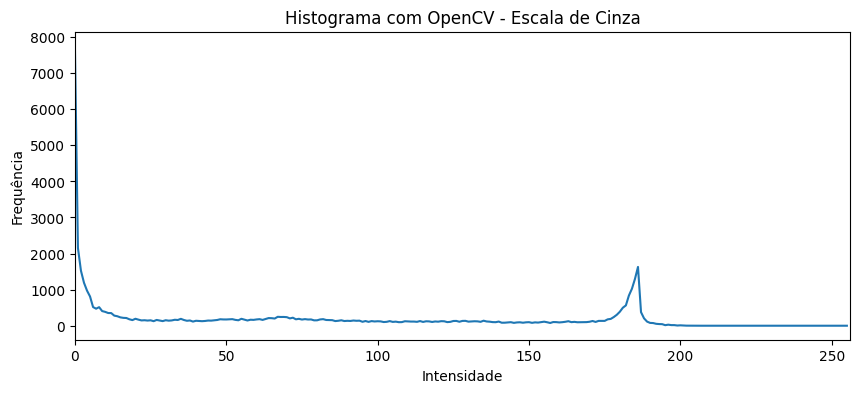

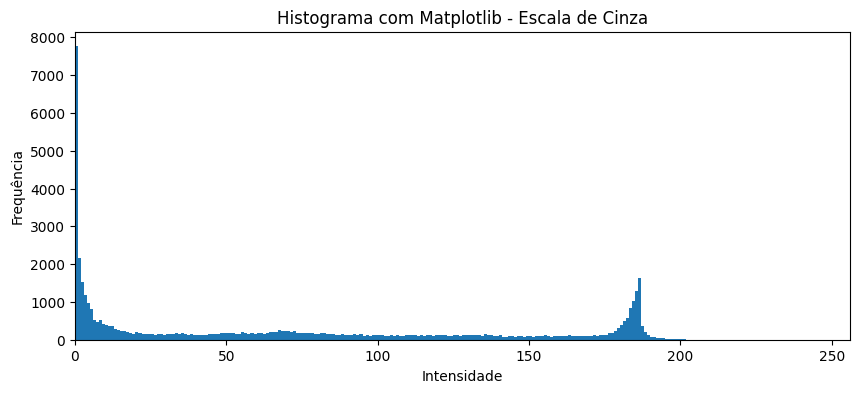

In [4]:

img_gray = img

# Calculando histograma com NumPy para imagem em escala de cinza
hist_np, bins = np.histogram(img_gray.ravel(), bins=256, range=[0,256])

plt.figure(figsize=(10,4))
plt.title('Histograma com NumPy - Escala de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.plot(hist_np)
plt.xlim([0,256])
plt.show()

# Calculando histograma com OpenCV para imagem em escala de cinza
hist_cv = cv2.calcHist([img_gray], [0], None, [256], [0,256])

plt.figure(figsize=(10,4))
plt.title('Histograma com OpenCV - Escala de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.plot(hist_cv)
plt.xlim([0,256])
plt.show()

# Exibindo o histograma com a função plt.hist
plt.figure(figsize=(10,4))
plt.hist(img_gray.ravel(),256,[0,256])
plt.title('Histograma com Matplotlib - Escala de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.xlim([0,256])
plt.show()


## Desafio1

- Quais são as diferenças e similaridades entre as abordagens?

- Importância do parâmetro range e do número de bins.


## Equalização do Histograma

A equalização de histograma é uma técnica utilizada para melhorar o contraste de uma imagem. Ela redistribui os níveis de intensidade de modo que o histograma da imagem equalizada se aproxime de uma distribuição uniforme. Isso é especialmente útil em imagens com contraste baixo ou má distribuição dos tons de cinza.

### Objetivos da Equalização:

- Melhorar o contraste: Ao expandir as áreas de baixa intensidade e comprimir as de alta intensidade, a imagem passa a apresentar mais detalhes.
- Realçar detalhes ocultos: Em imagens com fundo e objeto de intensidades muito próximas, a equalização pode ajudar a evidenciar detalhes que passariam despercebidos.


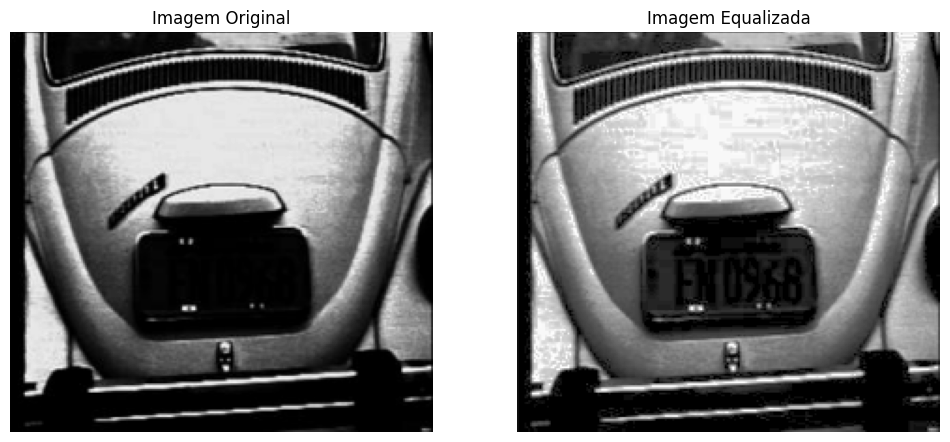

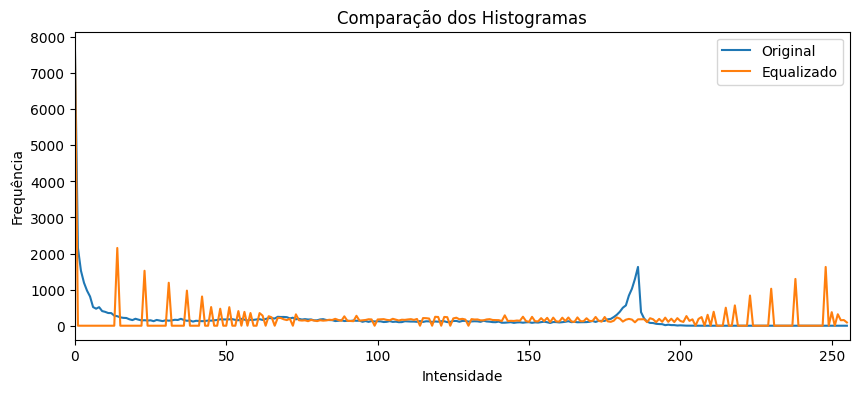

In [7]:
# Equalização do histograma utilizando OpenCV
img_eq = cv2.equalizeHist(img_gray)

# Plotando as imagens original e equalizada
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Imagem Original')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Imagem Equalizada')
plt.imshow(img_eq, cmap='gray')
plt.axis('off')
plt.show()

# Comparando os histogramas antes e depois da equalização
hist_original = cv2.calcHist([img_gray], [0], None, [256], [0,256])
hist_equalizado = cv2.calcHist([img_eq], [0], None, [256], [0,256])

plt.figure(figsize=(10,4))
plt.plot(hist_original, label='Original')
plt.plot(hist_equalizado, label='Equalizado')
plt.title('Comparação dos Histogramas')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.legend()
plt.xlim([0,256])
plt.show()

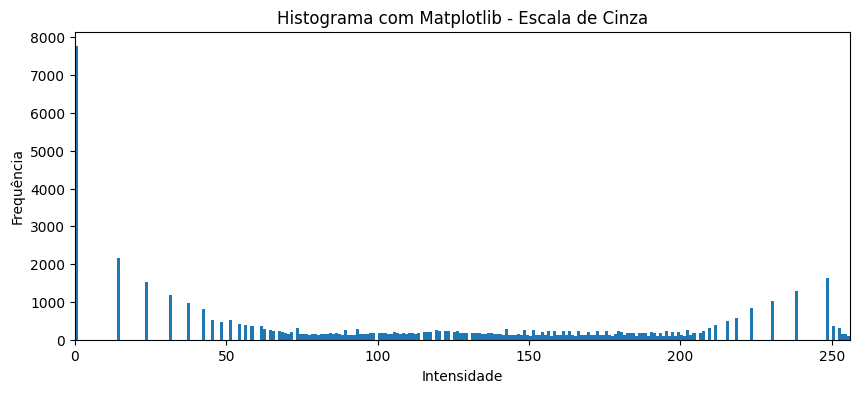

In [8]:
# Exibindo o histograma com a função plt.hist
plt.figure(figsize=(10,4))
plt.hist(img_eq.ravel(),256,[0,256])
plt.title('Histograma com Matplotlib - Escala de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.xlim([0,256])
plt.show()

Podemos fazer o mesmo para uma imgem colorida 

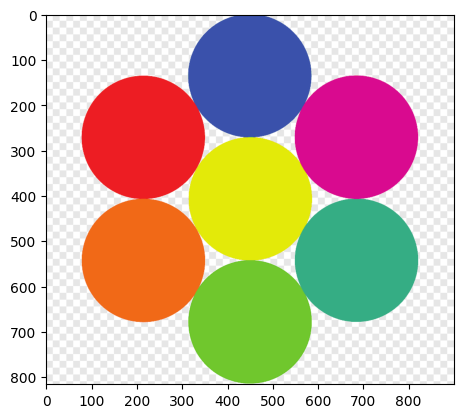

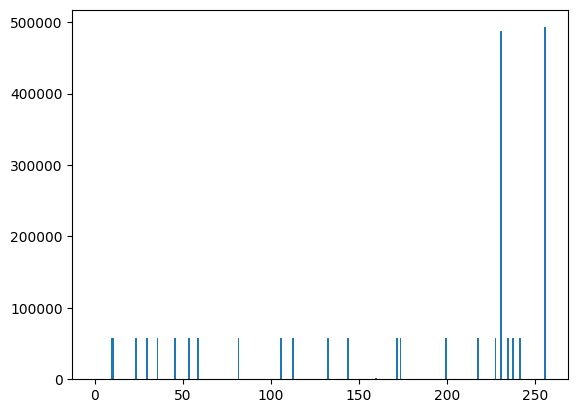

In [10]:
imagem = cv2.imread("bola.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()
plt.hist(image.ravel(),256,[0,256]); plt.show()

In [12]:
image.shape
# image[:,:,0] --- canal vermelho
# image[:,:,1] --- canal verde    
# image[:,:,2] --- canal azul
print("Canal Vermelho: ", image[:,:,0].shape)
print("Canal Verde: ", image[:,:,1].shape)
print("Canal Azul: ", image[:,:,2].shape)

Canal Vermelho:  (816, 900)
Canal Verde:  (816, 900)
Canal Azul:  (816, 900)


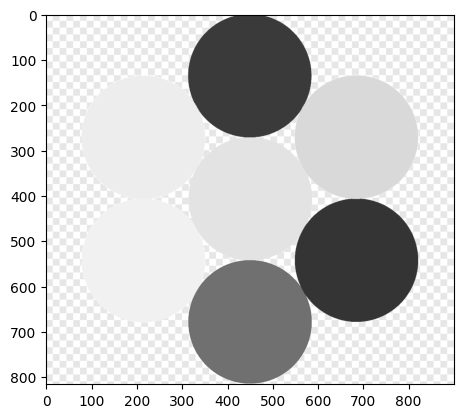

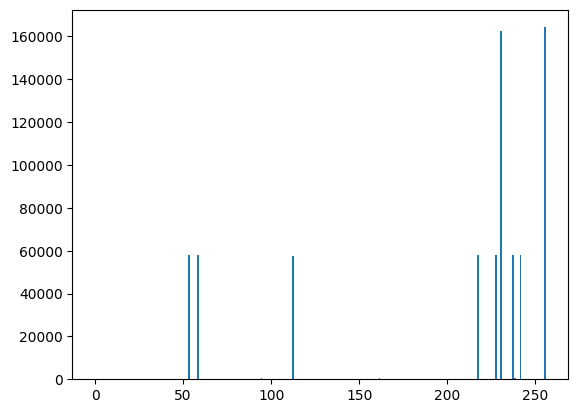

In [13]:
#histograma Vermelho
plt.imshow(image[:,:,0], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,0].ravel(),256,[0,256]); plt.show()

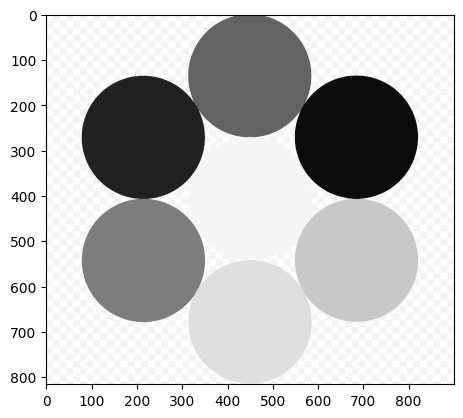

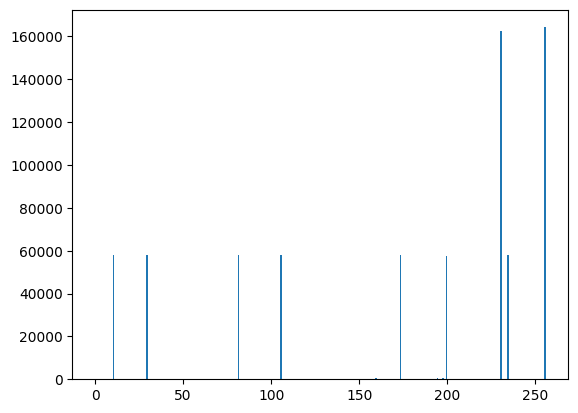

In [13]:
# Histogrma Verde
plt.imshow(image[:,:,1], cmap="Greys_r", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,1].ravel(),256,[0,256]); plt.show()

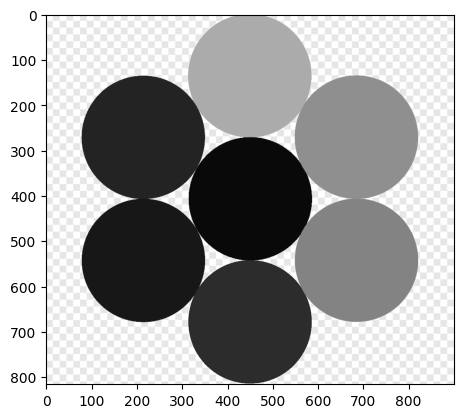

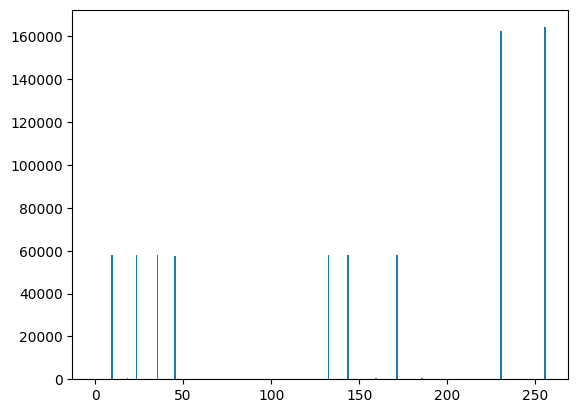

In [14]:
# Histograma Azul
plt.imshow(image[:,:,2], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,2].ravel(),256,[0,256]); plt.show()

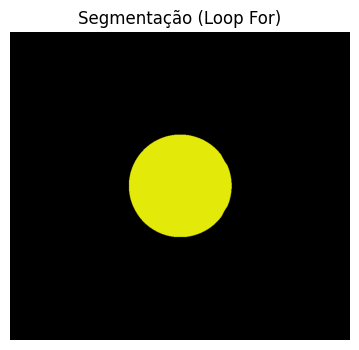

In [15]:
# Cria uma cópia para a segmentação
img_bola = image.copy()

# Varredura pixel a pixel utilizando laços for
for y in range(img_bola.shape[0]):
    for x in range(img_bola.shape[1]):
        # Condições aplicadas para o pixel (no formato RGB)
        # Aqui, se o canal verde <= 230 ou o canal vermelho >= 240, zera o pixel
        if img_bola[y, x, 1] <= 230 or img_bola[y, x, 0] >= 240:
            img_bola[y, x] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Loop For)')
# Convertendo de BGR para RGB para exibição correta
plt.imshow(img_bola)
plt.axis('off')
plt.show()

## Versão 2: Abordagem Vetorizada com NumPy

Nesta versão, criamos máscaras booleanas para cada condição e combinamos as máscaras para aplicar a segmentação de forma **vetorizada**. 

**Essa abordagem é muito mais eficiente e concisa.**

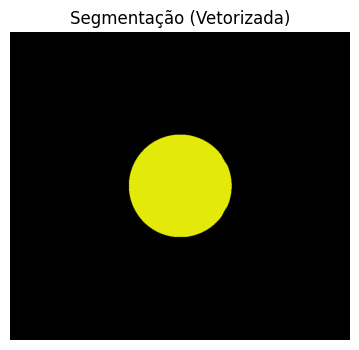

In [27]:
img_bola_vet = image.copy()

# Separando os canais (lembrando: B, G, R)
canal_vermelho = img_bola_vet[:, :, 0]
canal_verde = img_bola_vet[:, :, 1]

# Criar máscaras para as condições:
# - pixels com canal verde <= 230
# - pixels com canal vermelho >= 240
mask_verde = canal_verde <= 230
mask_vermelho  = canal_vermelho >= 240

# Combina as máscaras com operador lógico OR
mask = mask_verde | mask_vermelho

# Aplica a máscara: onde a condição é True, zera o pixel
img_bola_vet[mask] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Vetorizada)')
plt.imshow(img_bola_vet)
plt.axis('off')
plt.show()


## Desafio 2

Faça a seguimentação da bolinha de cor laranja.

Dica use 2 canais de cores para conseguir seguimentar. 

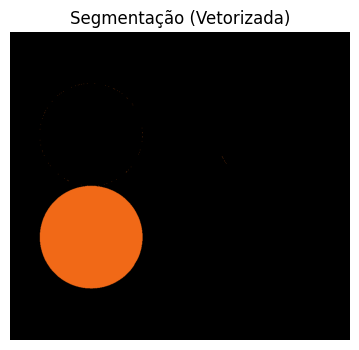

In [44]:

imagem = cv2.imread("bola.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Implemente seu código
img_bola_vet = image.copy()

# Separando os canais (lembrando: R, G, B)
canal_vermelho = img_bola_vet[:, :, 0]
canal_verde = img_bola_vet[:, :, 1]
canal_azul = img_bola_vet[:, :, 2]

# Criar máscaras para as condições:
# - pixels com canal verde <= 230
# - pixels com canal vermelho >= 240
# mask_verde = canal_verde <= 230
mask_vermelho  = canal_vermelho <= 239
mask_azul = canal_azul >= 50

# Combina as máscaras com operador lógico OR
mask = mask_vermelho | mask_azul

# Aplica a máscara: onde a condição é True, zera o pixel
img_bola_vet[mask] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Vetorizada)')
plt.imshow(img_bola_vet)
plt.axis('off')
plt.show()






## Desafio 3

Faça a seguimentação da bolinha para a imagem "bolinha.png". 

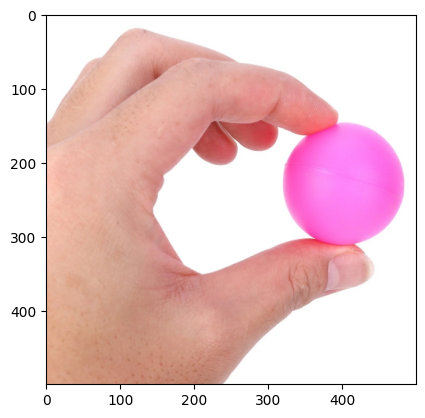

In [4]:
imagem = cv2.imread("bolinha.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()

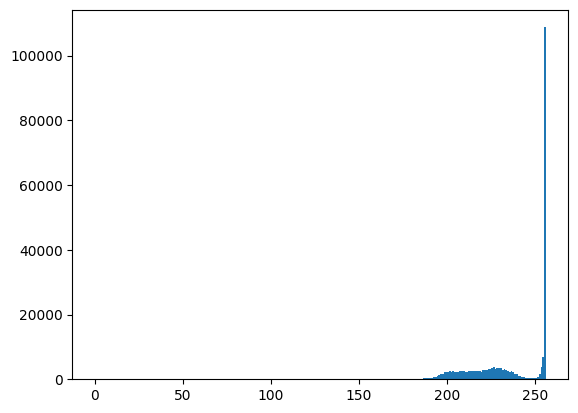

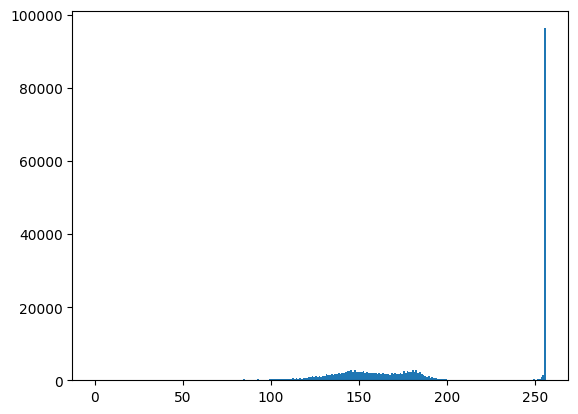

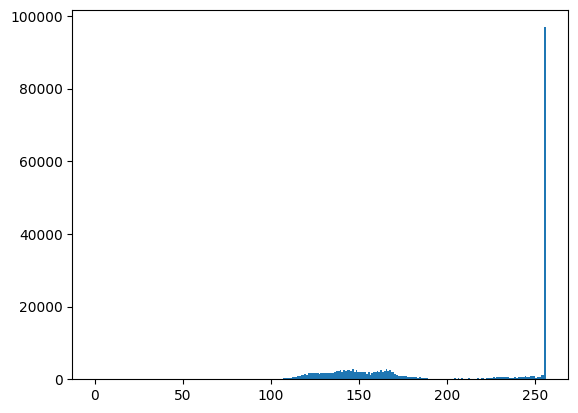

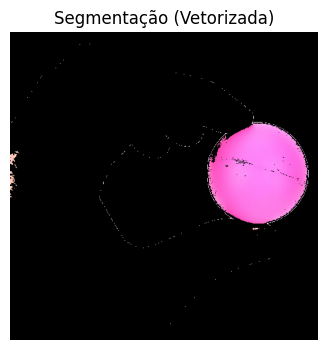

In [10]:
# Implemente seu código
# Histograma Vermelho
# plt.imshow(image[:,:,0], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,0].ravel(),256,[0,256]); plt.show()
# Histograma Verde
# plt.imshow(image[:,:,1], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,1].ravel(),256,[0,256]); plt.show()
# Histograma Azul
# plt.imshow(image[:,:,2], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,2].ravel(),256,[0,256]); plt.show()



# --------


# Implemente seu código
img_bola_vet = image.copy()

# Separando os canais (lembrando: R, G, B)
canal_vermelho = img_bola_vet[:, :, 0]
canal_verde = img_bola_vet[:, :, 1]
canal_azul = img_bola_vet[:, :, 2]

# Criar máscaras para as condições:
mask_vermelho  = canal_vermelho <= 250
mask_verde = canal_verde >= 240
mask_azul = canal_azul <= 180

# Combina as máscaras com operador lógico OR
mask = mask_vermelho | mask_verde | mask_azul

# Aplica a máscara: onde a condição é True, zera o pixel
img_bola_vet[mask] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Vetorizada)')
plt.imshow(img_bola_vet)
plt.axis('off')
plt.show()




## Operações aritméticas


### cv2.add:

Soma os pixels de duas imagens. Essa operação é útil para combinar imagens ou aumentar o brilho de uma imagem.
Diferencial: A função OpenCV trata corretamente casos de overflow (valores acima de 255).

### cv2.subtract:

Subtrai os pixels de uma imagem dos pixels de outra. Pode ser usada para realçar diferenças ou detectar mudanças entre duas imagens.
Diferencial: Assim como a adição, a subtração lida com underflow (valores menores que 0) de forma segura.

### cv2.addWeighted:

Combina duas imagens aplicando pesos para cada uma delas. A fórmula básica é:

dst=α⋅img1+β⋅img2+γ

onde α e β são os pesos das imagens e γ é uma constante adicionada ao resultado.

Aplicação: Ajuste de brilho, fusão de imagens, transições suaves.

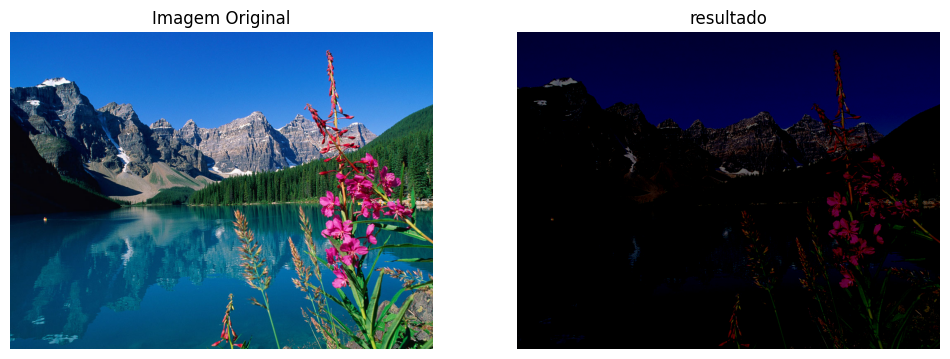

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread("NATUREZA_1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# cria uma matriz com o mesmo dimensional da imagem original, mas com valores 100
matriz = np.ones(img.shape, dtype="uint8") * 150



img2 = cv2.subtract(img, matriz)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Imagem Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('resultado')
plt.imshow(img2)
plt.axis('off')
plt.show()

## Webcam e OpenCV

## **Este recurso não vai funcionar no Google Colab**

Podemos usar a nossa webcam para registrar imagens e vídeos. Para isso, usamos a função `cv2.VideoCapture`.

### Em sua máquina local

1. **Crie um novo arquivo Python** ou use este notebook para executar o código abaixo.

2. **Escolha a fonte do video** se você quiser usar um vídeo MP4 em vez da webcam, basta passar o caminho do arquivo para cv2.VideoCapture:
    -  cv2.VideoCapture(0) # Inicializa a captura de vídeo da webcam (0 é o índice da câmera padrão)
    -  cv2.VideoCapture("video.mp4") # Carrega o arquivo de video



In [ ]:
import cv2

# Iniciando a captura de vídeo
cap = cv2.VideoCapture(1)


while True:
    # Tenta fazer a Captura do frame
    ret, frame = cap.read()

    # verifica se o frame foi capturado corretamente
    if not ret:
        print("Erro: Não foi possível capturar o frame.")
        break
    
    # processa o frame capturado
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Exibe o frame processado
    cv2.imshow('frame', gray)
    cv2.imshow('frame original', frame)
    # Aguarda 1 ms e verifica se a tecla 'q' foi pressionada para sair
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libera a captura e fecha todas as janelas
cap.release()
cv2.destroyAllWindows()

: 

## Desafio 4

Crie um script Python que execute o processameento de um video (webcam ou arquivo mp4) em sua maquina local. Crie uma função que processa a imagem e realizada uma operação de processamento de imagem que vimos até o momento em nosso curso.  

In [ ]:
# implemente seu código em um novo script python, não se esqueça de salvar o script no formato .py 